In [1]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('data/PRD/IL.csv')


In [2]:
df['lnEC']=1
df.to_csv('data/PRD/IL.csv')

In [3]:
filtered_df = df[(df['MP/K'] < 298) & (df['TDT/K'] > 400) & (df['V'] < 4.6)]

In [4]:
len(filtered_df)

4169

In [5]:
filtered_df.to_csv('1.csv')

In [2]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Normalized SMILES,MP/K,MP/K_STD,GTT/K,GTT/K_STD,TDT/K,TDT/K_STD,...,ST,ST_STD,R_STD,CO2,CO2_STD,HC,HC_STD,CO2_328,CO2_STD_328,lnEC
0,0,0,0,CC(=O)[O-].C[N+]1(C)CCCCCC1,366.5,9.990,192.9,3.475,470.5,11.020,...,38.00,1.1950,0.003220,-3.758,0.2477,6.010,0.04916,-4.100,0.2268,1
1,1,1,1,CCC(=O)[O-].C[N+]1(C)CCCCCC1,355.2,9.000,197.8,4.660,461.0,12.375,...,36.30,0.8550,0.002674,-3.768,0.2842,6.062,0.04224,-4.105,0.2654,1
2,2,2,2,CCCC(=O)[O-].C[N+]1(C)CCCCCC1,341.8,9.340,207.9,4.770,473.0,14.710,...,34.80,0.7495,0.002466,-3.744,0.2952,6.125,0.03310,-4.080,0.2740,1
3,3,3,3,CCCCC(=O)[O-].C[N+]1(C)CCCCCC1,351.8,10.810,207.8,4.453,477.5,12.490,...,33.56,0.7150,0.002815,-3.703,0.3080,6.195,0.03232,-4.035,0.2834,1
4,4,4,4,CCCCCC(=O)[O-].C[N+]1(C)CCCCCC1,347.2,7.656,216.4,4.492,482.0,10.780,...,32.38,0.8496,0.002708,-3.630,0.3180,6.297,0.03098,-3.959,0.2950,1


In [3]:
import numpy as np
# filtered_df = df[(df['MP/K'] < 298) & (df['TDT/K'] > 400)& (df['V'] < 4.6)& (np.exp(df['CO2']) > 0.03)& ((np.exp(df['CO2']) - np.exp(df['CO2_328'])) / np.exp(df['CO2']) >0.3)]
filtered_df = df[(df['MP/K'] < 298) & (df['TDT/K'] > 400)& (df['EC'] > 0) & (df['V'] < 4)]
filtered_df.head()



,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Normalized SMILES,MP/K,MP/K_STD,GTT/K,GTT/K_STD,TDT/K,TDT/K_STD,...,ST,ST_STD,R_STD,CO2,CO2_STD,HC,HC_STD,CO2_328,CO2_STD_328,lnEC
415057,415057,415057,415057,CCC[P+](C)(C)C.N#C[N-]C#N,287.2,13.20,185.9,4.496,558.0,9.390,...,48.30,1.8955,0.005276,-4.270,0.1781,6.156,0.05862,-4.650,0.1896,1
717461,717461,717461,717461,CNCC[n+]1ccn(C)c1.N#C[N-]C#N,287.0,14.82,188.4,8.270,487.0,9.340,...,49.44,1.9550,0.003040,-4.383,0.1969,5.940,0.02440,-4.777,0.2089,1
717499,717499,717499,717499,CCNCC[n+]1ccn(C)c1.N#C[N-]C#N,282.2,14.33,193.0,8.516,484.8,9.580,...,47.06,2.3790,0.002560,-4.316,0.1971,6.000,0.03815,-4.710,0.2042,1
718221,718221,718221,718221,CN(C)CC[n+]1ccn(C)c1.N#C[N-]C#N,292.0,13.80,198.0,7.535,471.0,8.530,...,47.00,1.9330,0.003365,-4.290,0.1814,6.047,0.04810,-4.680,0.1875,1
718411,718411,718411,718411,COCC[n+]1ccn(C)c1.N#C[N-]C#N,286.5,9.54,190.5,8.125,500.5,10.336,...,46.20,3.0180,0.003883,-4.336,0.2223,5.977,0.02298,-4.742,0.2450,1


In [4]:
filtered_df.to_csv('3.csv')

In [3]:
len(filtered_df)

38

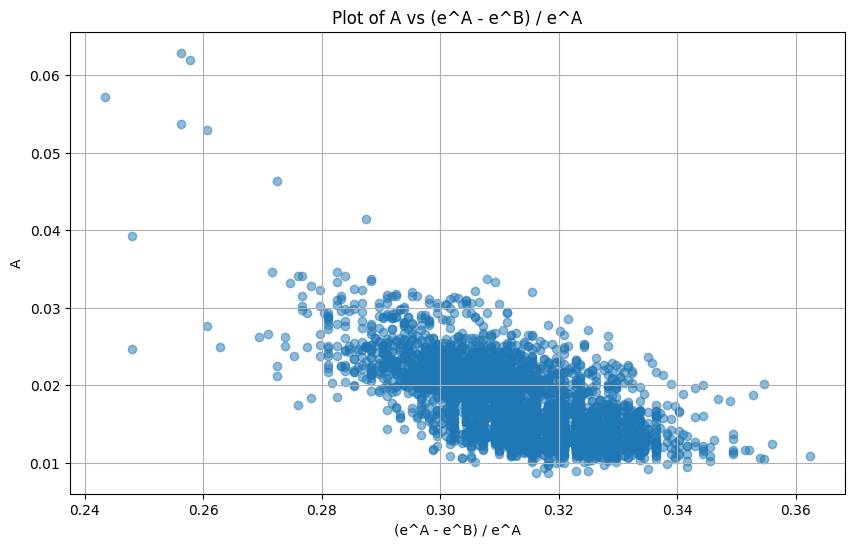

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 假设A列和B列的列名分别为'A'和'B'
A = filtered_df['CO2']
B = filtered_df['CO2_328']


y=np.exp(A)
# 计算横坐标
x = (np.exp(A) - np.exp(B)) / np.exp(A)


# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)  # alpha用于调整透明度
plt.title('Plot of A vs (e^A - e^B) / e^A')
plt.xlabel('(e^A - e^B) / e^A')
plt.ylabel('A')
plt.grid()
plt.show()


In [30]:
from rdkit import Chem
from rdkit.Chem import Draw

df_co2=pd.read_csv('data/CO2/Norm_CO2.csv')

# 提取 'Normalized SMILES' 列
smiles_list = df_co2['Normalized SMILES'].drop_duplicates()[:50]


# 生成分子对象
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if smiles]

# 绘制分子图
img = Draw.MolsToGridImage(molecules, molsPerRow=3, subImgSize=(200, 200))


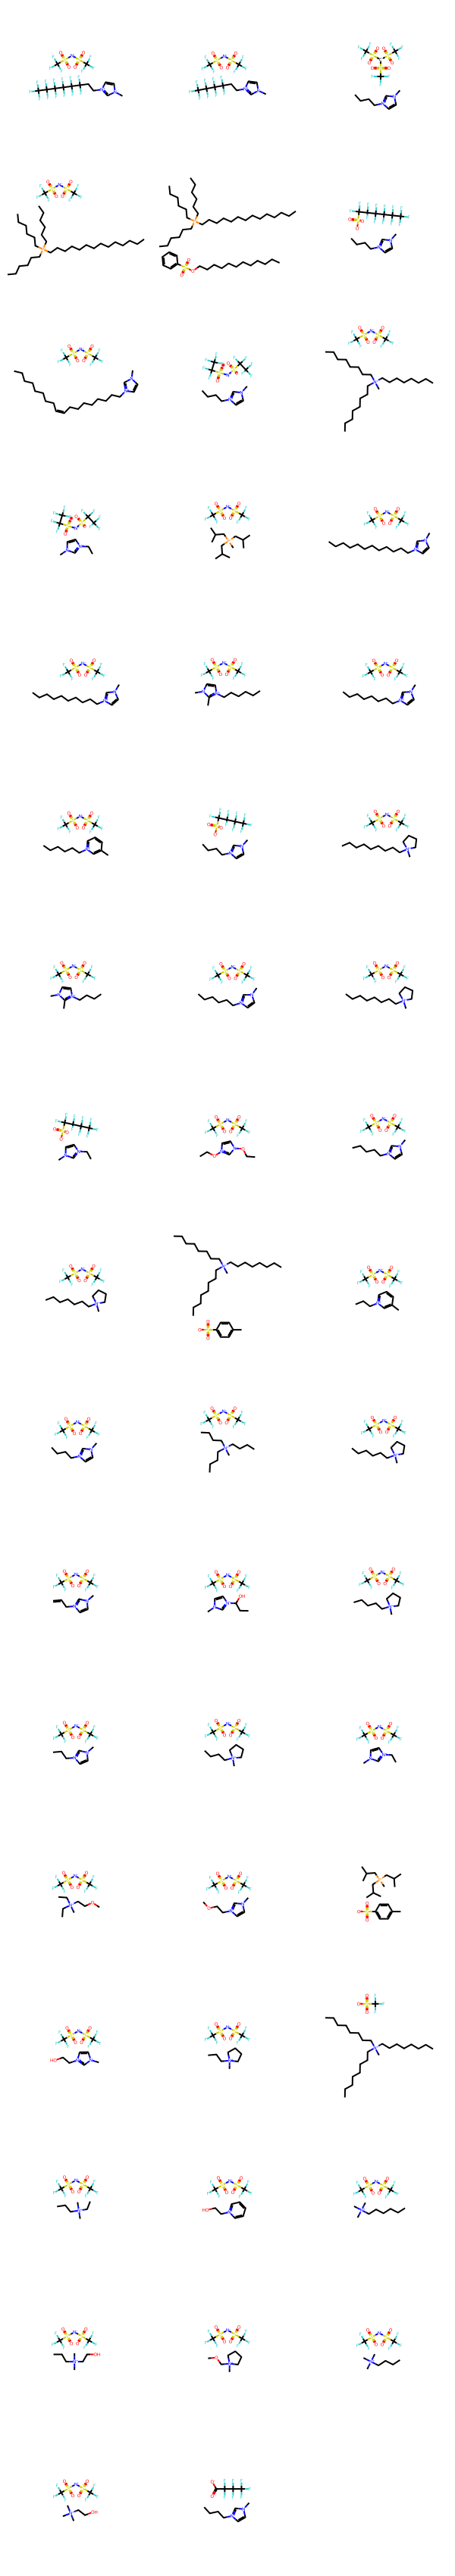

In [31]:
img

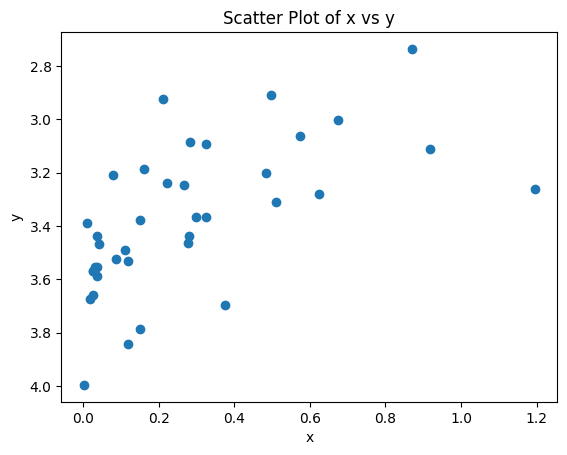

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 画散点图
plt.scatter(filtered_df['EC'], filtered_df['V'])
plt.title('Scatter Plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().invert_yaxis()  # 翻转 y 轴
plt.grid(False)  # 取消背景的白线
plt.show()


In [8]:
import numpy as np

filtered_df1 = df[(df['EC'] > 0) & (df['V'] < 4)]
filtered_df1.head()



,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,...,ST_STD,R_STD,CO2,CO2_STD,HC,HC_STD,ln(x_CO2),CO2_328,CO2_STD_328,lnEC
414981,414981,414981,414981,414981,414981,414981,414981,414981,414981,414981,...,1.6350,0.006100,-4.453,0.1648,6.070,0.05774,0,-4.832,0.1792,0
415019,415019,415019,415019,415019,415019,415019,415019,415019,415019,415019,...,1.5570,0.004932,-4.410,0.1672,6.086,0.05954,0,-4.793,0.1840,0
415057,415057,415057,415057,415057,415057,415057,415057,415057,415057,415057,...,1.8955,0.005276,-4.270,0.1781,6.156,0.05862,0,-4.650,0.1896,0
415285,415285,415285,415285,415285,415285,415285,415285,415285,415285,415285,...,1.8500,0.003357,-4.360,0.1637,6.156,0.05423,0,-4.754,0.1660,0
415323,415323,415323,415323,415323,415323,415323,415323,415323,415323,415323,...,1.8300,0.003338,-4.266,0.1770,6.220,0.05157,0,-4.660,0.1691,0


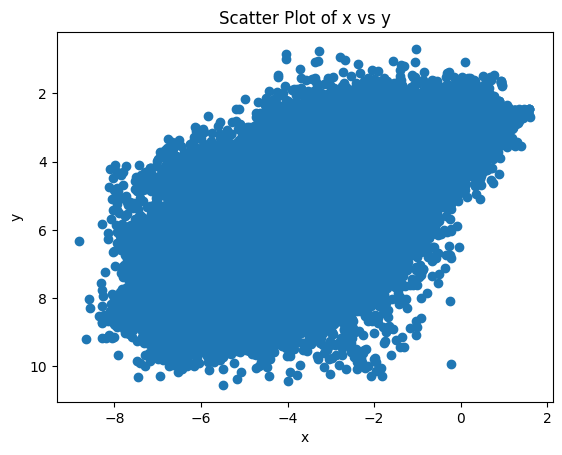

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 画散点图
plt.scatter(df['EC'], df['V'])
plt.title('Scatter Plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().invert_yaxis()  # 翻转 y 轴
plt.grid(False)  # 取消背景的白线
plt.show()


In [13]:
filtered_df1

,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,...,ST_STD,R_STD,CO2,CO2_STD,HC,HC_STD,ln(x_CO2),CO2_328,CO2_STD_328,lnEC
414981,414981,414981,414981,414981,414981,414981,414981,414981,414981,414981,...,1.6350,0.006100,-4.453,0.16480,6.070,0.05774,0,-4.832,0.17920,0
415019,415019,415019,415019,415019,415019,415019,415019,415019,415019,415019,...,1.5570,0.004932,-4.410,0.16720,6.086,0.05954,0,-4.793,0.18400,0
415057,415057,415057,415057,415057,415057,415057,415057,415057,415057,415057,...,1.8955,0.005276,-4.270,0.17810,6.156,0.05862,0,-4.650,0.18960,0
415285,415285,415285,415285,415285,415285,415285,415285,415285,415285,415285,...,1.8500,0.003357,-4.360,0.16370,6.156,0.05423,0,-4.754,0.16600,0
415323,415323,415323,415323,415323,415323,415323,415323,415323,415323,415323,...,1.8300,0.003338,-4.266,0.17700,6.220,0.05157,0,-4.660,0.16910,0
416349,416349,416349,416349,416349,416349,416349,416349,416349,416349,416349,...,2.1910,0.002980,-4.344,0.16870,6.215,0.06415,0,-4.734,0.17190,0
717461,717461,717461,717461,717461,717461,717461,717461,717461,717461,717461,...,1.9550,0.003040,-4.383,0.19690,5.940,0.02440,0,-4.777,0.20890,0
718411,718411,718411,718411,718411,718411,718411,718411,718411,718411,718411,...,3.0180,0.003883,-4.336,0.22230,5.977,0.02298,0,-4.742,0.24500,0
722059,722059,722059,722059,722059,722059,722059,722059,722059,722059,722059,...,2.1880,0.003702,-4.550,0.23720,6.016,0.02155,0,-4.945,0.26540,0
921814,921814,921814,921814,921814,921814,921814,921814,921814,921814,921814,...,1.3545,0.005420,-4.610,0.18740,5.746,0.03192,0,-5.016,0.16270,0


In [14]:
filtered_df1.to_csv('3.csv')

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw

# 输入 SMILES 字符串
smiles = 'CC[N+]1(C)CCCC1.N#C[N-]C#N'  # 这里可以替换为你想要的 SMILES

# 生成分子对象
molecule = Chem.MolFromSmiles(smiles)

# 绘制分子结构并保存为 PNG 文件
if molecule:
    img = Draw.MolToImage(molecule)
    img.save('figure/molecule4.png')  # 保存为 molecule.png
else:
    print("无效的 SMILES 字符串")
